In [ ]:
import tensorflow as tf

Dataset link: http://vision.stanford.edu/aditya86/ImageNetDogs/

### I have downloaded the file and extracted in my local system.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
dataset = '/content/drive/MyDrive/Dog_Vision_Data'

In [ ]:
import os
os.getcwd()

In [ ]:
os.chdir('/content/drive/MyDrive/Dog_Vision_Data')

In [ ]:
os.getcwd()

In [ ]:
print(os.listdir('.'))


In [ ]:
for dirpath, dirnames, filenames in os.walk('/content/drive/MyDrive/Dog_Vision_Data'):
    print(f"Current directory: {dirpath}")
    print(f"Subdirectories: {dirnames}")
    print(f"Files: {filenames}")
    print("\n")


## Dataset has 3 folders - annotation, images, list

1. In Lists folder

*   train_list.mat - a list of all the training set images.
*   test_list.mat - a list of all the testing set images.
*   file_list.mat - a list of all the files (training and test list combined).

2. In Images Folder
Images/ - a folder containing all of the images of dogs. (No sep test and train files)

3. In Annotation Folder
Annotation/ - a folder containing all of the annotations for each dog breed.

Now let us go through folders one by one.





# The idea is to create a data structure like this
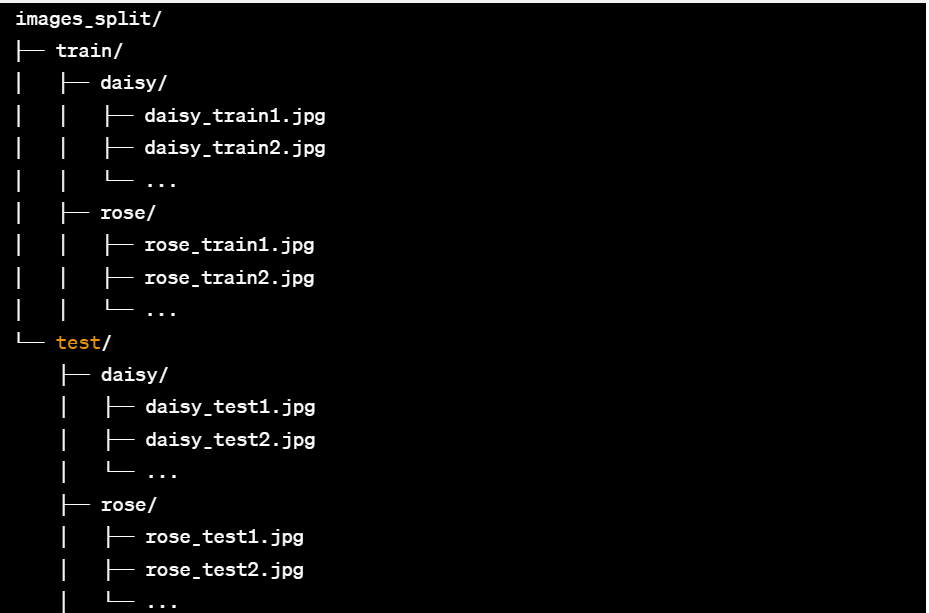

## First let us go through lists folder

In [ ]:
import scipy

# Open lists of train and test .mat
train_list = scipy.io.loadmat("/content/drive/MyDrive/Dog_Vision_Data/lists/train_list.mat")
test_list = scipy.io.loadmat("/content/drive/MyDrive/Dog_Vision_Data/lists/test_list.mat")
file_list = scipy.io.loadmat("/content/drive/MyDrive/Dog_Vision_Data/lists/file_list.mat")

# Let's inspect the output and type of the train_list
train_list, type(train_list)

In [ ]:
train_list.keys()

In [ ]:
test_list.keys()

In [ ]:
file_list.keys()

In [ ]:
# Check the length of the file_list key in every file
print(f"Number of files in training list: {len(train_list['file_list'])}")
print(f"Number of files in testing list: {len(test_list['file_list'])}")
print(f"Number of files in full list: {len(file_list['file_list'])}")

lists contain our training, test splits and the file list has a list of all the files in the dataset.

So this file form the basis of how our data to be split



In [ ]:
train_list['file_list']

In [ ]:
train_list['file_list'][0][0]

In [ ]:
train_list['file_list'][0][0][0]

In [ ]:
train_file_list = list([item[0][0] for item in train_list["file_list"]])
test_file_list = list([item[0][0] for item in test_list["file_list"]])
full_file_list = list([item[0][0] for item in file_list["file_list"]])

len(train_file_list), len(test_file_list), len(full_file_list)

In [ ]:
import random
random.sample(train_file_list, k=10)

In [ ]:
# To check whether there is overlap between test and train dataset
len(set(train_file_list).intersection(test_file_list))

In [ ]:
train_file_list[0]

In [ ]:
from IPython.display import Image
from pathlib import Path

#"Images" is the directory name and train_file_list[0] is the filename of the first image in the train_file_list.
image_path = Path("Images", train_file_list[0])

# Display the image
Image(image_path)

# Now let us go through Annotation Folder

In [ ]:
os.listdir("Annotation")

In [ ]:
len('Annotation')

That is not true!!!
Let me Google

In [ ]:
from pathlib import Path

In [ ]:
current_folder = Path('Annotation')

In [ ]:
folder_count = 0

for path in current_folder.iterdir():
    if path.is_dir():
        folder_count += 1

print(f'Number of folders in the directory: {folder_count}')

# Now let us go through Images Folder

In [ ]:
# Get a list of all image folders
image_folders = os.listdir("Images")
image_folders[:10]

### Let us make a dictionary of values for images

{'n02085782-Japanese_spaniel'    :        'japanese_spaniel',                                    
'n02106662-German_shepherd': 'german_shepherd',                        
'n02093256-Staffordshire_bullterrier': 'staffordshire_bullterrier',
}

In [ ]:
folder_to_class_name_dict = {}
for folder_name in image_folders:
  temp_name = folder_name.split("-")[1:]
  class_name = "_".join(temp_name).lower()
  if class_name != '':  # Check if the class name is not empty
        folder_to_class_name_dict[folder_name] = class_name     # dict[key] = values

assert len(folder_to_class_name_dict) == 120

In [ ]:
sorted(folder_to_class_name_dict.items())[:5]

In [ ]:
sorted(folder_to_class_name_dict.keys())[:5]

In [ ]:
sorted(folder_to_class_name_dict.values())[:5]

In [ ]:
dog_names = sorted(list(folder_to_class_name_dict.values()))
dog_names[:10]

In [ ]:
from typing import List
from pathlib import Path
import matplotlib.pyplot as plt
import random

image_folder = Path("Images")
path_list = [image_folder / file for file in train_file_list]

# Randomly sample 10 paths from the list
samples = random.sample(path_list, 10)

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# iterator that pairs each element from axes.flat with the corresponding element from samples
for i, ax in enumerate(axes.flat):
    sample_path = samples[i]

    # Extract the parent directory name to use as the title
    extract_title = True
    sample_title = folder_to_class_name_dict[sample_path.parent.stem] if extract_title else sample_path.parent.stem

    ax.imshow(plt.imread(sample_path))
    ax.set_title(sample_title)
    ax.axis("off")

plt.show()



In [ ]:
from pathlib import Path

# Specify the target directory
target_directory = "/content/drive/MyDrive/Dog_Vision_Data/Images"

# Create a Path object for the target directory
images_dir = Path(target_directory)

# Iterate through all subdirectories and count files
folder_file_counts = [
    {"folder_name": folder.name, "file_count": len(list(folder.iterdir()))}
    for folder in images_dir.iterdir() if folder.is_dir()
]

# Print the result
for result in folder_file_counts:
    print(f"Folder: {result['folder_name']}, File Count: {result['file_count']}")


In [ ]:
# Create a DataFrame
import pandas as pd
image_counts_df = pd.DataFrame(folder_file_counts).sort_values(by="file_count", ascending=False)
image_counts_df.head()

In [ ]:
image_counts_df["folder_name"] = image_counts_df["folder_name"].map(folder_to_class_name_dict)
image_counts_df.head()

In [ ]:
# Turn the image counts DataFrame into a graph
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 14))
image_counts_df.plot(kind="bar",
                     x="folder_name",
                     y="file_count",
                     legend=False,
                     ax=plt.gca()) # plt.gca() = "get current axis", get the plt we setup above and put the data there

# Add customization
plt.ylabel("Image Count")
plt.title("Total Image Counts by Class")
plt.xticks(rotation=90, # Rotate the x labels for better visibility
           fontsize=8) # Make the font size smaller for easier reading
plt.tight_layout()
plt.show()

# **Train Test Split**

Create an empty test,train directory and add images in it

In [ ]:
def folder_file_counts(directory):
    count = 0
    for item in directory.iterdir():
        if item.is_dir():
            count += 1
    return count


In [ ]:
from pathlib import Path

# Define the target directory for image splits to go
images_split_dir = Path("images_split")

# Define the training and test directories
train_dir = images_split_dir / "train"
test_dir = images_split_dir / "test"

# Using Path.mkdir with exist_ok=True ensures the directory is created only if it doesn't exist
train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)
print(f"Directory {train_dir} is ensured to exist.")
print(f"Directory {test_dir} is ensured to exist.")

# Make a folder for each dog name
for dog_name in dog_names:       # from images folder
  # Make training dir folder
  train_class_dir = train_dir / dog_name
  train_class_dir.mkdir(parents=True, exist_ok=True)
  # print(f"Making directory: {train_class_dir}")

  # Make testing dir folder
  test_class_dir = test_dir / dog_name
  test_class_dir.mkdir(parents=True, exist_ok=True)
  # print(f"Making directory: {test_class_dir}")



In [ ]:
# See the first 10 directories in the training split dir
sorted([str(dir_name) for dir_name in train_dir.iterdir() if dir_name.is_dir()])[:10]

## **Add images**

In [41]:
from pathlib import Path
from shutil import copy2    # similar to the copy function, but it also tries to preserve timestamps, permissions, and other file metadata.
from tqdm.auto import tqdm

def copy_files_to_target_dir(file_list: list[str],
                             target_dir: str,
                             images_dir: str = "Images",
                             verbose: bool = False) -> None:
    """
    Copies a list of files from the images directory to a target directory.

    Parameters:
    file_list (list[str]): A list of file paths to copy.
    target_dir (str): The destination directory path where files will be copied.
    images_dir (str, optional): The directory path where the images are currently stored. Defaults to 'Images'.
    verbose (bool, optional): If set to True, the function will print out the file paths as they are being copied. Defaults to False.

    Returns:
    None
    """
    for file in tqdm(file_list):
        source_file_path = Path(images_dir) / file     # Images folder/ file_list.mat
        file_class_name = folder_to_class_name_dict[Path(file).parts[0]]   # values of our dict which is dog name will be obtained
        destination_file_path = Path(target_dir) / file_class_name / Path(file).name   #  target_directory(yet to be createed)/pomeranian (yet to be createed)/dog.jpg
        destination_file_path.parent.mkdir(parents=True, exist_ok=True)

        if verbose:
            print(f"[INFO] Copying: {source_file_path} to {destination_file_path}")

        copy2(src=source_file_path, dst=destination_file_path)


In [56]:
# Already loaded
copy_files_to_target_dir(file_list=train_file_list,
                         target_dir=train_dir,    # defined above as path to train dir
                         verbose=False)

  0%|          | 0/12000 [00:00<?, ?it/s]

In [45]:
copy_files_to_target_dir(file_list=test_file_list,
                         target_dir=test_dir,
                         verbose=False)

  0%|          | 0/8580 [00:00<?, ?it/s]

In [42]:
import tensorflow as tf

img_size = 224
batch_size = 32


train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    batch_size=32,
    image_size=(img_size, img_size),
    shuffle=True,
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    batch_size=32,
    image_size=(img_size, img_size),
    shuffle=False,
    seed=42
)

Found 12100 files belonging to 120 classes.
Found 8580 files belonging to 120 classes.


In [43]:
class_names = train_ds.class_names
class_names[:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

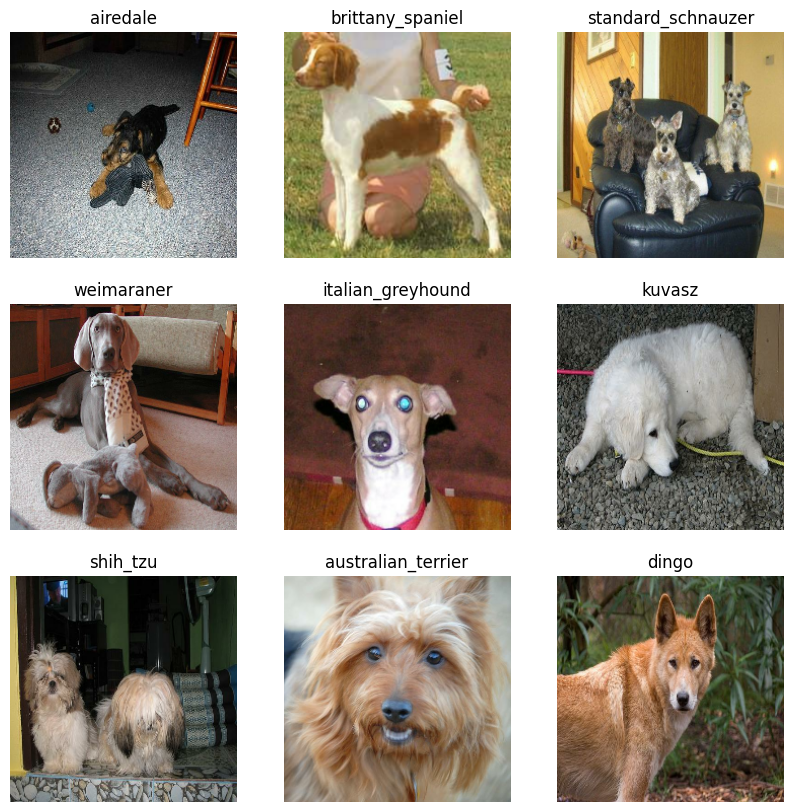

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [45]:
# Iterate over train_ds and once completed go for next batch
image_batch, label_batch = next(iter(train_ds))
image_batch.shape, label_batch.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

In [46]:
AUTOTUNE = tf.data.AUTOTUNE

# Shuffle training datasets but don't need to shuffle test datasets (for easier evaluation)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## DATA AUGMENTATION

In [47]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [48]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [49]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

## Using Transfer Learning for our dataset

In [50]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_shape=(img_size, img_size, 3),
    include_preprocessing=True
)


# Freeze the base model
base_model.trainable = False
base_model.trainable

False

In [51]:
EfficientNetV2B0_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(120, activation='softmax'),
])

EfficientNetV2B0_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = EfficientNetV2B0_model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=test_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10


# Evaluation

In [ ]:
def plot_model_loss_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(14, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

plot_model_loss_curves(history)

In [ ]:
test_preds = history.predict(test_ds)

In [ ]:
import numpy as np
test_ds_images = np.concatenate([images for images, labels in test_ds], axis=0)
test_ds_labels = np.concatenate([labels for images, labels in test_ds], axis=0)
test_ds_labels[0], test_ds_images[0]

In [ ]:
# Choose a random 10 indexes from the test data and compare the values
import random

random_indexes = random.sample(range(len(test_ds_images)), 10)

fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  target_index = random_indexes[i]

  # Get relevant target image, label, prediction and prediction probabilities
  test_image = test_ds_images[target_index]
  test_image_truth_label = class_names[test_ds_labels[target_index]]
  test_image_pred_probs = test_preds[target_index]
  test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

  # Plot the image
  ax.imshow(test_image.astype("uint8"))

  # Create sample title
  title = f"""True: {test_image_truth_label}
  Pred: {test_image_pred_class}
  Prob: {np.max(test_image_pred_probs):.2f}"""

  # Colour the title based on correctness of pred
  ax.set_title(title,
               color="green" if test_image_truth_label == test_image_pred_class else "red")
  ax.axis("off")

# Save the model

In [ ]:
model.save("dog_vision_model.keras")

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model("dog_vision_model.keras")

# Evaluate the loaded model
loaded_model_results = loaded_model.evaluate(test_ds)